In [41]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np


In [42]:
medical_clean_path = r'C:\Users\mbray\OneDrive\Documents\212\medical_clean.csv'


In [43]:
df = pd.read_csv(medical_clean_path)

In [44]:
print(df.head())

   CaseOrder Customer_id                           Interaction  \
0          1     C412403  8cd49b13-f45a-4b47-a2bd-173ffa932c2f   
1          2     Z919181  d2450b70-0337-4406-bdbb-bc1037f1734c   
2          3     F995323  a2057123-abf5-4a2c-abad-8ffe33512562   
3          4     A879973  1dec528d-eb34-4079-adce-0d7a40e82205   
4          5     C544523  5885f56b-d6da-43a3-8760-83583af94266   

                                UID          City State        County    Zip  \
0  3a83ddb66e2ae73798bdf1d705dc0932           Eva    AL        Morgan  35621   
1  176354c5eef714957d486009feabf195      Marianna    FL       Jackson  32446   
2  e19a0fa00aeda885b8a436757e889bc9   Sioux Falls    SD     Minnehaha  57110   
3  cd17d7b6d152cb6f23957346d11c3f07  New Richland    MN        Waseca  56072   
4  d2f0425877b10ed6bb381f3e2579424a    West Point    VA  King William  23181   

        Lat       Lng  ...  TotalCharge Additional_charges Item1 Item2  Item3  \
0  34.34960 -86.72508  ...  3726.702860  

In [45]:
# Check the structure of the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [46]:
# Check the data types of each column
print(df.dtypes)


CaseOrder               int64
Customer_id            object
Interaction            object
UID                    object
City                   object
State                  object
County                 object
Zip                     int64
Lat                   float64
Lng                   float64
Population              int64
Area                   object
TimeZone               object
Job                    object
Children                int64
Age                     int64
Income                float64
Marital                object
Gender                 object
ReAdmis                object
VitD_levels           float64
Doc_visits              int64
Full_meals_eaten        int64
vitD_supp               int64
Soft_drink             object
Initial_admin          object
HighBlood              object
Stroke                 object
Complication_risk      object
Overweight             object
Arthritis              object
Diabetes               object
Hyperlipidemia         object
BackPain  

In [47]:
print(df.isnull().sum())

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

In [48]:
# Check for duplicates
duplicates = df.duplicated()

# Display the total number of duplicate rows
num_duplicates = duplicates.sum()
print(f'Total number of duplicate rows: {num_duplicates}')

if num_duplicates > 0:
    duplicate_rows = df[duplicates]
    print(duplicate_rows)

Total number of duplicate rows: 0


In [49]:
categorical = [
    'VitD_levels',
    'Initial_days',
    'TotalCharge',
    'Additional_charges',
    'Age',
    'Income',
    'Doc_visits',
    'Full_meals_eaten',
    'Population'
]

# Function to identify outliers using IQR for specified columns
def find_outliers_iqr(df, columns):
    outlier_indices = []
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_indices.extend(outliers.index.tolist())
        
    return set(outlier_indices)

# Get unique outlier indices
outlier_indices_iqr = find_outliers_iqr(df, categorical)
print(f'Total number of outliers found using IQR: {len(outlier_indices_iqr)}')

Total number of outliers found using IQR: 1588


In [50]:
dataset = df.copy()

In [51]:
dataset = dataset.drop(columns=['CaseOrder','Customer_id','Interaction', 'UID', 'Lat', 'Lng','City', 'Zip','State', 'Area', 'Children', 'TimeZone', 'County', 'Job', 'Marital', 'Gender', 'vitD_supp', 'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services', 'VitD_levels', 'Additional_charges', 'Age', 'Income', 'Doc_visits', 'Full_meals_eaten', 'Population', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'])

In [52]:
# Check unique values for potentially problematic columns
for col in [ 'Initial_days', 'TotalCharge']:
    print(f"Unique values in {col}: {dataset[col].unique()}")


Unique values in Initial_days: [10.58576971 15.12956221  4.77217721 ... 70.15418    63.3569
 70.85059   ]
Unique values in TotalCharge: [3726.70286  4193.190458 2434.234222 ... 8276.481    7644.483
 7887.553   ]


In [53]:
# Select continuous variables for clustering
features = dataset[[ 'Initial_days', 'TotalCharge']]


In [54]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Convert the scaled features back to a DataFrame for easier interpretation
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)


In [55]:
# Check the data types of each column
print(dataset.dtypes)


ReAdmis          object
Initial_days    float64
TotalCharge     float64
dtype: object


In [56]:
# Save the cleaned dataset to a CSV file
dataset.to_csv('C:/Users/mbray/OneDrive/Documents/212/new_cleaned_medical_data.csv', index=False)

In [57]:
# Convert specified columns to numeric, forcing errors to NaN
numeric_columns = [
    'Initial_days',
    'TotalCharge',
    ]

for col in numeric_columns:
    dataset[col] = pd.to_numeric(dataset[col], errors='coerce')  # Coerce errors to NaN

# Check if there are any NaN values after conversion
print(dataset[numeric_columns].isnull().sum())


Initial_days    0
TotalCharge     0
dtype: int64


In [58]:
# Fill NaN values with the mean of each column
dataset[numeric_columns] = dataset[numeric_columns].fillna(dataset[numeric_columns].mean())

# Alternatively, you can drop rows with NaN values
# df.dropna(subset=numeric_columns, inplace=True)


In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [60]:

sampled_df = dataset.sample(n=1000, random_state=42)
features = dataset[[ 'Initial_days', 'TotalCharge']]

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [61]:
from sklearn.preprocessing import StandardScaler

# Select two continuous variables (e.g., Age and Income)
features = dataset[['Initial_days', 'TotalCharge']]  # Replace these with your chosen continuous variables

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Convert scaled features back to DataFrame (optional, but good for clarity)
features_scaled_df = pd.DataFrame(features_scaled, columns=['Initial_days', 'TotalCharge'])


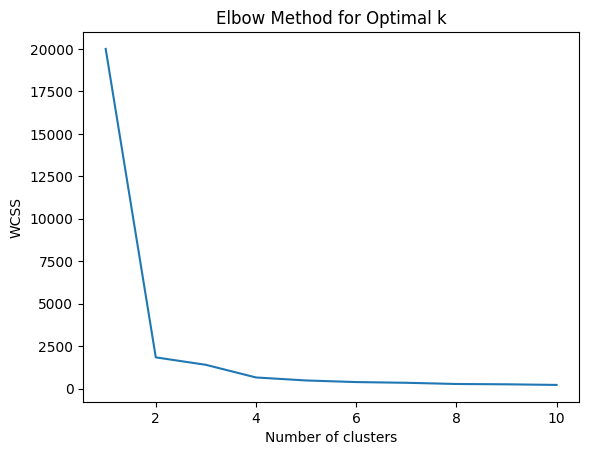

In [62]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Calculate WCSS (Within-cluster sum of squares) for a range of k
wcss = []
for i in range(1, 11):  # Testing for k from 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_scaled_df)
    wcss.append(kmeans.inertia_)  # inertia_ gives the WCSS for the current k

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


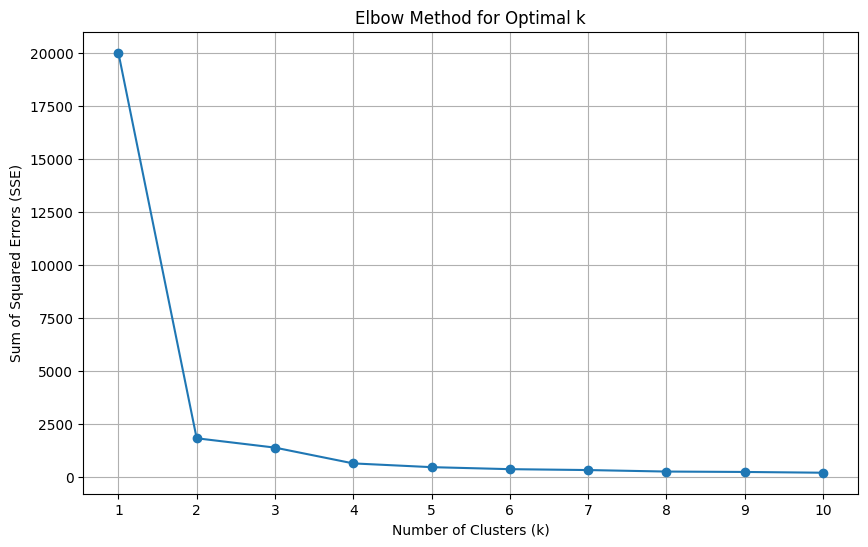

In [63]:
# Specify the features for clustering
features = dataset[[ 'Initial_days', 'TotalCharge']]

# Define the range of k values to test
k_values = range(1, 11)
sse = []

# Run K-means clustering for each value of k and calculate SSE
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features_df)
    sse.append(kmeans.inertia_)  # SSE is stored in inertia_

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(k_values)
plt.grid()
plt.show()

In [64]:
kmeans_optimal = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans_optimal.fit_predict(features_scaled_df)

# Add the cluster labels to the scaled DataFrame
features_scaled_df['Cluster'] = cluster_labels

# Display the first few rows of the DataFrame with cluster labels
print(features_scaled_df.head())

# Optionally, count the number of samples per cluster
cluster_counts = features_scaled_df['Cluster'].value_counts()
print(f"Cluster counts:\n{cluster_counts}")


   Initial_days  TotalCharge  Cluster
0     -0.907310    -0.727185        0
1     -0.734595    -0.513228        0
2     -1.128292    -1.319983        0
3     -1.244503    -1.460517        0
4     -1.261991    -1.467285        0
Cluster counts:
Cluster
0    5002
1    4998
Name: count, dtype: int64


In [65]:
# Evaluate different numbers of clusters (k) and calculate silhouette scores
silhouette_scores = []
k_values = range(2, 10)  # Check for k from 2 to 10


In [66]:
# Analyze the characteristics of each cluster
cluster_analysis = features_scaled_df.groupby('Cluster')[['Initial_days', 'TotalCharge']].mean()
print("Cluster Characteristics:\n", cluster_analysis)


Cluster Characteristics:
          Initial_days  TotalCharge
Cluster                           
0           -0.958450    -0.946704
1            0.959217     0.947462


In [80]:
# Randomly sample 1000 rows from the dataset
sampled_df = features_scaled_df.sample(n=1000, random_state=42)

# Fit KMeans with the optimal k (2)
kmeans_optimal = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans_optimal.fit_predict(sampled_df.drop('Cluster', axis=1))

# Add the cluster labels to the sampled DataFrame
sampled_df['Cluster'] = cluster_labels

# Calculate the silhouette score for the optimal k using the sampled DataFrame
silhouette_avg_optimal = silhouette_score(sampled_df.drop('Cluster', axis=1), cluster_labels)
print(f'Average Silhouette Score for optimal k: {silhouette_avg_optimal:.3f}')


Average Silhouette Score for optimal k: 0.773


In [71]:
# Check the unique values in the 'Cluster' column
print(features_scaled_df['Cluster'].unique())

[0 1]


In [72]:
# Check for missing values in the 'ReAdmis' column
missing_readmis = dataset['ReAdmis'].isnull().sum()
print(f"Number of missing values in 'ReAdmis': {missing_readmis}")

Number of missing values in 'ReAdmis': 0


In [73]:
features_scaled_df['ReAdmis'] = dataset['ReAdmis'].values

In [74]:
print("Unique values in 'Cluster':", features_scaled_df['Cluster'].unique())

Unique values in 'Cluster': [0 1]


In [75]:
print(features_scaled_df['ReAdmis'].dtype)

object


In [76]:
# Assuming 'ReAdmis' has values like 'Yes' and 'No'
features_scaled_df['ReAdmis'] = features_scaled_df['ReAdmis'].map({'Yes': 1, 'No': 0})

# Now calculate the readmission rate for each cluster
readmission_rate_by_cluster = features_scaled_df.groupby('Cluster')['ReAdmis'].mean()
print("Readmission Rate by Cluster:\n", readmission_rate_by_cluster)


Readmission Rate by Cluster:
 Cluster
0    0.000000
1    0.734094
Name: ReAdmis, dtype: float64


In [77]:
print("Cluster Counts:\n", features_scaled_df['Cluster'].value_counts())

Cluster Counts:
 Cluster
0    5002
1    4998
Name: count, dtype: int64


In [78]:
# Identify the cluster with the higher likelihood of readmission
highest_readmission_cluster = readmission_rate_by_cluster.idxmax()
highest_rate = readmission_rate_by_cluster.max()
print(f'Cluster {highest_readmission_cluster} has the highest readmission rate at {highest_rate:.2%}')


Cluster 1 has the highest readmission rate at 73.41%


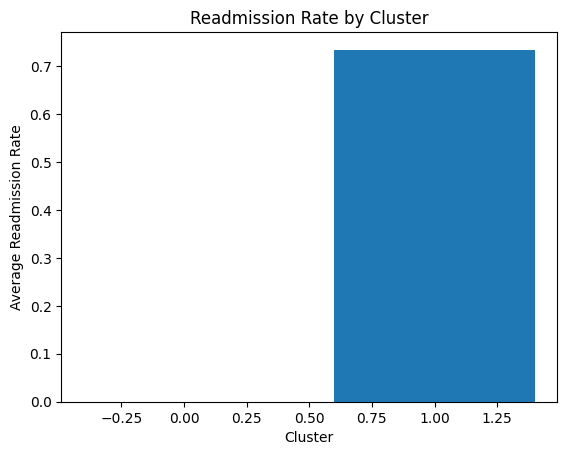

In [79]:
import matplotlib.pyplot as plt

plt.bar(readmission_rate_by_cluster.index, readmission_rate_by_cluster.values)
plt.xlabel('Cluster')
plt.ylabel('Average Readmission Rate')
plt.title('Readmission Rate by Cluster')
plt.show()


In [ ]:
# Calculate the mean of features for each cluster
cluster_analysis = features_scaled_df.groupby('Cluster').mean(numeric_only=True)
print(cluster_analysis)